<table>
  <tr><td>
    <img src="h8.png">
  </td></tr>
<table>

# Pengenalan Project

Sentimen analisis adalah metode untuk melakukan prediksi sentimen terhadap sebuah teks yang diberikan. Nilai sentimen biasanya bernilai positif dan negatif. Projek ini bertujuan untuk melakukan eksperimentasi model Sentimen Analisis pada data twitter menggunakan beberapa metode. Dataset yang digunakan mengacu pada link berikut:

https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia#analisis-sentimen-tentang-opini-pilkada-dki-2017-pada-dokumen-twitter-berbahasa-indonesia-menggunakan-na%C3%AFve-bayes-dan-pembobotan-emoji

Kemudian beberapa metode yang diterapkan adalah:

1. Sentimen analisis dengan Naive Bayes(Input: Matriks Bag Of Word)
2. Sentimen analisis dengan Naive Bayes(Input: Matriks TFIDF)
3. Sentimen analisis dengan CNN pada library TensorFlow(Input: Embedding Vektor)


Ketiga model tersebut dipilih karena berdasarkan referensi2 yang penulis baca, ketiga model tersebut adalah model yang sering dipakai.

# Tahap-tahap Sentimen Analysis
 
1. Memuat Data
2. Melakukan Data Cleaning
3. Melakukan Data Preprocessing
4. Melakukan Pelatihan Model
5. Melakukan Evaluasi Model

# Sentimen Analisis dengan Naive Bayes
# (Input: Matriks Bag Of Word)

## Import Library

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import random

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

## Memuat Dataset

In [124]:
df = pd.read_csv('dataset_tweet_sentiment_pilkada_DKI_2017.csv')
print(df.shape)
df.head()

(900, 4)


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


In [125]:
df.Sentiment.value_counts()

positive    450
negative    450
Name: Sentiment, dtype: int64

## Data Cleaning

In [126]:
#Menghapus strip(<br />) html
def remove_strip_html(text):
    return re.sub('<br />','',text)
df['Text Tweet']=df['Text Tweet'].apply(remove_strip_html)
df.head(8)

,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...
5,6,negative,Agus-Sylvi,aneh deh lebay masa ini di sangkut pautkan sam...
6,7,negative,Agus-Sylvi,Kepada Allah SWT kami ucapkan rasa syukur dan ...
7,8,negative,Agus-Sylvi,Terima Kasih teruntuk pendukung #AHY #SYLVI ka...


In [127]:
#Menghapus karakter-karakter yang tidak diinginkan
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text=text.lower()
    return text
df['Text Tweet']=df['Text Tweet'].apply(remove_special_characters)
df['Text Tweet'].head(8)

0    banyak akun kloning seolah2 pendukung agussilv...
1    agussilvy bicara apa kasihan yaalap itu air ma...
2    kalau aku sih gak nunggu hasil akhir qc tp lag...
3    kasian oh kasian dengan peluru 1milyar untuk t...
4    maaf ya pendukung agussilvyhayo dukung aniessa...
5    aneh deh lebay masa ini di sangkut pautkan sam...
6    kepada allah swt kami ucapkan rasa syukur dan ...
7    terima kasih teruntuk pendukung ahy sylvi kali...
Name: Text Tweet, dtype: object

In [128]:
#Menghapus angka
def remove_angka(text):
    return re.sub(r"\d+","",text)
df['Text Tweet']=df['Text Tweet'].apply(remove_angka)
df.head(8)

,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,banyak akun kloning seolah pendukung agussilvy...
1,2,negative,Agus-Sylvi,agussilvy bicara apa kasihan yaalap itu air ma...
2,3,negative,Agus-Sylvi,kalau aku sih gak nunggu hasil akhir qc tp lag...
3,4,negative,Agus-Sylvi,kasian oh kasian dengan peluru milyar untuk ti...
4,5,negative,Agus-Sylvi,maaf ya pendukung agussilvyhayo dukung aniessa...
5,6,negative,Agus-Sylvi,aneh deh lebay masa ini di sangkut pautkan sam...
6,7,negative,Agus-Sylvi,kepada allah swt kami ucapkan rasa syukur dan ...
7,8,negative,Agus-Sylvi,terima kasih teruntuk pendukung ahy sylvi kali...


## Data Preparation

In [129]:
corpus=df['Text Tweet']
vectorizer = CountVectorizer()
X= vectorizer.fit_transform(corpus).todense()
X

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [130]:
label=vectorizer.get_feature_names()

In [131]:
df_matrix = pd.DataFrame(X, columns =label, dtype = float)
df_matrix

,aa,aagym,aamiin,abaaah,abal,abang,abis,absurd,abunawas,aburizal,...,youtubebxrzdua,yra,yudhoyono,yuk,yusuf,zalim,zarazettirazr,zarazettirazz,zippermouth,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
y = [0 if i=='negative' else 1 for i in data['Sentiment']]
print(y[:5])

[0, 0, 0, 0, 0]


In [133]:
# Membagi dataset menjadi data latih dan data uji
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.20, random_state=1234)

## Melatih Model

In [134]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_latih,y_latih)

GaussianNB()

In [135]:
# Melakukan prediksi dengan model KNN pada data X_uji
y_pred=model.predict(X_uji)

## Evaluasi Model

In [136]:
# Menghitung akurasi model
accuracy_score(y_uji, y_pred)

0.6833333333333333

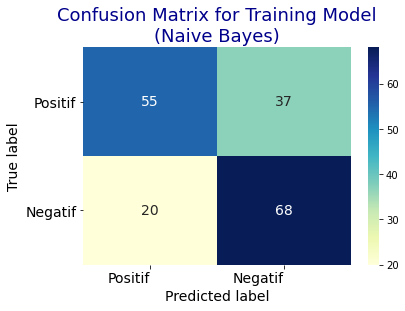

In [137]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_uji, y_pred)), ('Positif', 'Negatif'), ('Positif', 'Negatif'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Naive Bayes)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Sentimen analisis dengan Naive Bayes
# (Input: Matriks TFIDF)

## Import Library

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import random

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

## Memuat Dataset

In [139]:
df = pd.read_csv('dataset_tweet_sentiment_pilkada_DKI_2017.csv')
print(df.shape)
df.head()

(900, 4)


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


In [140]:
df.Sentiment.value_counts()

positive    450
negative    450
Name: Sentiment, dtype: int64

## Data Cleaning

In [141]:
#Menghapus strip(<br />) html
def remove_strip_html(text):
    return re.sub('<br />','',text)
df['Text Tweet']=df['Text Tweet'].apply(remove_strip_html)
df.head(8)

,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...
5,6,negative,Agus-Sylvi,aneh deh lebay masa ini di sangkut pautkan sam...
6,7,negative,Agus-Sylvi,Kepada Allah SWT kami ucapkan rasa syukur dan ...
7,8,negative,Agus-Sylvi,Terima Kasih teruntuk pendukung #AHY #SYLVI ka...


In [142]:
#Menghapus karakter-karakter yang tidak diinginkan
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text=text.lower()
    return text
df['Text Tweet']=df['Text Tweet'].apply(remove_special_characters)
df['Text Tweet'].head(8)

0    banyak akun kloning seolah2 pendukung agussilv...
1    agussilvy bicara apa kasihan yaalap itu air ma...
2    kalau aku sih gak nunggu hasil akhir qc tp lag...
3    kasian oh kasian dengan peluru 1milyar untuk t...
4    maaf ya pendukung agussilvyhayo dukung aniessa...
5    aneh deh lebay masa ini di sangkut pautkan sam...
6    kepada allah swt kami ucapkan rasa syukur dan ...
7    terima kasih teruntuk pendukung ahy sylvi kali...
Name: Text Tweet, dtype: object

In [143]:
#Menghapus angka
def remove_angka(text):
    return re.sub(r"\d+","",text)
df['Text Tweet']=df['Text Tweet'].apply(remove_angka)
df.head(8)

,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,banyak akun kloning seolah pendukung agussilvy...
1,2,negative,Agus-Sylvi,agussilvy bicara apa kasihan yaalap itu air ma...
2,3,negative,Agus-Sylvi,kalau aku sih gak nunggu hasil akhir qc tp lag...
3,4,negative,Agus-Sylvi,kasian oh kasian dengan peluru milyar untuk ti...
4,5,negative,Agus-Sylvi,maaf ya pendukung agussilvyhayo dukung aniessa...
5,6,negative,Agus-Sylvi,aneh deh lebay masa ini di sangkut pautkan sam...
6,7,negative,Agus-Sylvi,kepada allah swt kami ucapkan rasa syukur dan ...
7,8,negative,Agus-Sylvi,terima kasih teruntuk pendukung ahy sylvi kali...


## Data Preparation

In [144]:
corpus=df['Text Tweet']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).todense()
X

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [145]:
label=vectorizer.get_feature_names()

In [146]:
df_matrix = pd.DataFrame(X, columns =label, dtype = float)
df_matrix

,aa,aagym,aamiin,abaaah,abal,abang,abis,absurd,abunawas,aburizal,...,youtubebxrzdua,yra,yudhoyono,yuk,yusuf,zalim,zarazettirazr,zarazettirazz,zippermouth,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
y = [0 if i=='negative' else 1 for i in data['Sentiment']]
print(y[:5])

[0, 0, 0, 0, 0]


In [148]:
# Membagi dataset menjadi data latih dan data uji
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.20, random_state=1234)

## Melatih Model

In [149]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_latih,y_latih)

GaussianNB()

In [150]:
# Melakukan prediksi dengan model KNN pada data X_uji
y_pred=model.predict(X_uji)

## Evaluasi Model

In [151]:
# Menghitung akurasi model
accuracy_score(y_uji, y_pred)

0.6833333333333333

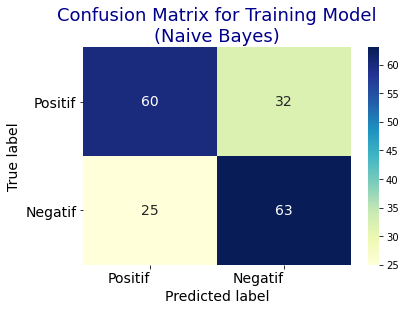

In [152]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_uji, y_pred)), ('Positif', 'Negatif'), ('Positif', 'Negatif'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Naive Bayes)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Sentimen Analisis dengan CNN pada library TensorFlow  

# (Input: Embedding Vektor)

## Import Library

In [169]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Flatten

import tensorflow as tf

In [181]:
df = pd.read_csv('dataset_tweet_sentiment_pilkada_DKI_2017.csv')
print(df.shape)
df.head()

(900, 4)


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


In [182]:
df.Sentiment.value_counts()

positive    450
negative    450
Name: Sentiment, dtype: int64

## Data Cleaning

In [183]:
#Menghapus strip(<br />) html
def remove_strip_html(text):
    return re.sub('<br />','',text)
df['Text Tweet']=df['Text Tweet'].apply(remove_strip_html)
df.head(8)

,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...
5,6,negative,Agus-Sylvi,aneh deh lebay masa ini di sangkut pautkan sam...
6,7,negative,Agus-Sylvi,Kepada Allah SWT kami ucapkan rasa syukur dan ...
7,8,negative,Agus-Sylvi,Terima Kasih teruntuk pendukung #AHY #SYLVI ka...


In [184]:
#Menghapus karakter-karakter yang tidak diinginkan
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text=text.lower()
    return text
df['Text Tweet']=df['Text Tweet'].apply(remove_special_characters)
df['Text Tweet'].head(8)

0    banyak akun kloning seolah2 pendukung agussilv...
1    agussilvy bicara apa kasihan yaalap itu air ma...
2    kalau aku sih gak nunggu hasil akhir qc tp lag...
3    kasian oh kasian dengan peluru 1milyar untuk t...
4    maaf ya pendukung agussilvyhayo dukung aniessa...
5    aneh deh lebay masa ini di sangkut pautkan sam...
6    kepada allah swt kami ucapkan rasa syukur dan ...
7    terima kasih teruntuk pendukung ahy sylvi kali...
Name: Text Tweet, dtype: object

In [185]:
#Menghapus angka
def remove_angka(text):
    return re.sub(r"\d+","",text)
df['Text Tweet']=df['Text Tweet'].apply(remove_angka)
df.head(8)

,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,banyak akun kloning seolah pendukung agussilvy...
1,2,negative,Agus-Sylvi,agussilvy bicara apa kasihan yaalap itu air ma...
2,3,negative,Agus-Sylvi,kalau aku sih gak nunggu hasil akhir qc tp lag...
3,4,negative,Agus-Sylvi,kasian oh kasian dengan peluru milyar untuk ti...
4,5,negative,Agus-Sylvi,maaf ya pendukung agussilvyhayo dukung aniessa...
5,6,negative,Agus-Sylvi,aneh deh lebay masa ini di sangkut pautkan sam...
6,7,negative,Agus-Sylvi,kepada allah swt kami ucapkan rasa syukur dan ...
7,8,negative,Agus-Sylvi,terima kasih teruntuk pendukung ahy sylvi kali...


## Data Preparation

In [188]:
#Mengkodekan sentimen negatif=0 dan positif=1
cleanup_nums = {"Sentiment":     {"negative": 0, "positive": 1}}
df.replace(cleanup_nums, inplace=True)
df.Sentiment.head(8)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
Name: Sentiment, dtype: int64

In [189]:
y=df['Sentiment']
y=to_categorical(y)
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [187]:
text = df['Text Tweet']

In [191]:
token =Tokenizer()
token.fit_on_texts(text)

In [192]:
token.index_word

{1: 'ahy',
 2: 'ahokdjarot',
 3: 'pilkadadki',
 4: 'yang',
 5: 'aniessandi',
 6: 'ahok',
 7: 'dan',
 8: 'face',
 9: 'di',
 10: 'jakarta',
 11: 'untuk',
 12: 'tidak',
 13: 'pilkada',
 14: 'with',
 15: 'hand',
 16: 'ini',
 17: 'pak',
 18: 'dki',
 19: 'anies',
 20: 'menang',
 21: 'smiling',
 22: 'dari',
 23: 'okeoce',
 24: 'kalah',
 25: 'jadi',
 26: 'dengan',
 27: 'ya',
 28: 'saya',
 29: 'ada',
 30: 'itu',
 31: 'indonesia',
 32: 'ok',
 33: 'jangan',
 34: 'sudah',
 35: 'bukan',
 36: 'gubernur',
 37: 'victory',
 38: 'pendukung',
 39: 'lagi',
 40: 'ke',
 41: 'lebih',
 42: 'tapi',
 43: 'masih',
 44: 'warga',
 45: 'akan',
 46: 'eyes',
 47: 'baru',
 48: 'dalam',
 49: 'bunga',
 50: 'karena',
 51: 'pada',
 52: 'djarot',
 53: 'bisa',
 54: 'orang',
 55: 'pilih',
 56: 'kami',
 57: 'aniesbaswedan',
 58: 'pemimpin',
 59: 'mereka',
 60: 'kita',
 61: 'kalau',
 62: 'btp',
 63: 'mau',
 64: 'aja',
 65: 'basuki',
 66: 'semua',
 67: 'apa',
 68: 'aku',
 69: 'baik',
 70: 'saja',
 71: 'semoga',
 72: 'suara',
 7

In [193]:
vocab=len(token.index_word)+1
print(vocab)

3688


In [194]:
encode_text=token.texts_to_sequences(text)
print(encode_text)

[[77, 200, 1322, 1323, 38, 107, 295, 805, 81, 5, 26, 1324, 7, 1325, 1326, 1327], [107, 575, 67, 296, 1328, 30, 420, 806, 1329], [61, 68, 297, 122, 347, 101, 807, 576, 1330, 39, 347, 1331, 577, 17, 172, 298, 67, 808, 107, 578], [421, 809, 421, 26, 1332, 810, 11, 811, 579, 107, 12, 1333, 1334, 13, 422, 423], [424, 27, 38, 1335, 87, 5, 1336, 1337, 812], [580, 253, 813, 108, 16, 9, 1338, 1339, 75, 814, 1340, 173, 813, 102, 109, 173, 87, 107], [118, 152, 581, 56, 582, 425, 583, 7, 118, 17, 172, 1341, 1, 56, 1342, 426, 1343, 72, 173], [82, 95, 815, 38, 1, 427, 1344, 1345, 428, 16], [1346, 95, 132, 1347, 254, 1, 83, 174, 109, 1348, 1349, 584, 816, 1350, 348, 1351], [1352, 817, 225, 1], [1353, 96, 1354, 91, 1355, 1], [1356, 255, 47, 349, 175, 350, 29, 92, 9, 1357, 72, 1, 1358, 1359], [34, 256, 1360, 585, 429, 818, 1361, 22, 1362, 1], [68, 103, 226, 1, 430, 1363, 351, 81, 18], [586, 4, 1364, 30, 12, 69, 27, 1365, 1], [587, 588, 431, 819, 1, 24, 88, 153, 1366, 820, 12, 1367, 63, 1368, 91], [61, 

In [195]:
max_kata=100
X = pad_sequences(encode_text, maxlen=max_kata, padding='post')
X

array([[  77,  200, 1322, ...,    0,    0,    0],
       [ 107,  575,   67, ...,    0,    0,    0],
       [  61,   68,  297, ...,    0,    0,    0],
       ...,
       [  16, 3678, 3679, ...,    0,    0,    0],
       [3682,   23,  572, ...,    0,    0,    0],
       [ 294,  939,  131, ...,    0,    0,    0]])

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=40,test_size=0.3, stratify=y) 

In [176]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

## Melatih Model

In [197]:
#Mendefinisikan model CNN
model=Sequential()                                                                      #Model sekuensial
model.add(Embedding(vocab, 32, input_length=max_kata))                                  #Embedding (Layer Input)
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))         #Layer Konvolusi
model.add(Dropout(0.5))         
model.add(MaxPooling1D(pool_size=2))                                                    #Layer MaxPooling
model.add(Flatten())                                                                    #Flatten
model.add(Dense(250, activation='relu'))                                                #Layer perseptron
model.add(Dense(2, activation='sigmoid'))                                               #Layer Output

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           118016    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 32)           3104      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               400250    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [198]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [199]:
history=model.fit(X_train, 
                  y_train, 
                  validation_data=(X_test, y_test), 
                  epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 17ms/step - loss: 0.7012 - accuracy: 0.5332 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6910 - accuracy: 0.5157 - val_loss: 0.6900 - val_accuracy: 0.5519
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.6705 - accuracy: 0.7384 - val_loss: 0.6725 - val_accuracy: 0.6148
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.5701 - accuracy: 0.8211 - val_loss: 0.6059 - val_accuracy: 0.6741
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.2939 - accuracy: 0.9176 - val_loss: 0.5726 - val_accuracy: 0.6963
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1011 - accuracy: 0.9653 - val_loss: 0.5562 - val_accuracy: 0.7370
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0333 - accuracy: 0.9944 - val_loss: 0.5895 - val_accuracy: 0.7296
Epoch 

## Evaluasi Model

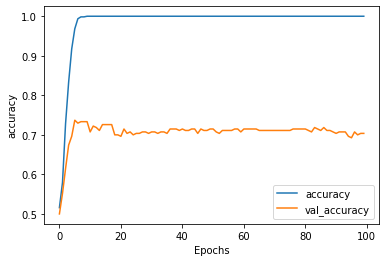

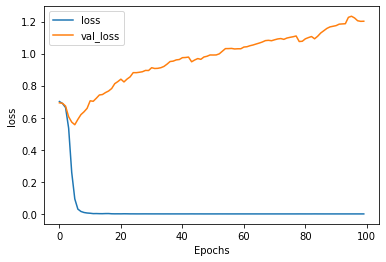

In [200]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Kesimpulan:

Akurasi Model Naive Bayes BoW : 0.683333

Akurasi Model Naive Bayes TFIDF : 0.683333

Akurasi Model CNN : 0.7037